<a href="https://colab.research.google.com/github/JoremBlue/customer-attrition-data-analysis/blob/main/customer_attrition_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== INITIAL UNCLEANED DATASET ===
ClientID       Years MonthlyExpenses AgreementType Attrition
  Cli101          25            8421       Monthly         0
  Cli102      thirty           12567        Annual         1
  Cli103         NaN            7032       Monthly         0
  Cli104          19             NaN        Annual         1
  Cli105          24            9821       Monthly     maybe
  Cli106          27            4382           NaN         0
  Cli107          21             NaN       Monthly         1
  Cli108          28            6230         Annul         0
  Cli109          23 eleven thousand       Monthly         1
  Cli110          20           -9345        Annual         1
  Cli111          26            4890       Monthly      none
  Cli112         NaN           10321       Monthly         1
  Cli113          29            8765      Monthly          0
  Cli114 twenty-four            5920       Monthly         1
  Cli115          23           11890        Annual 

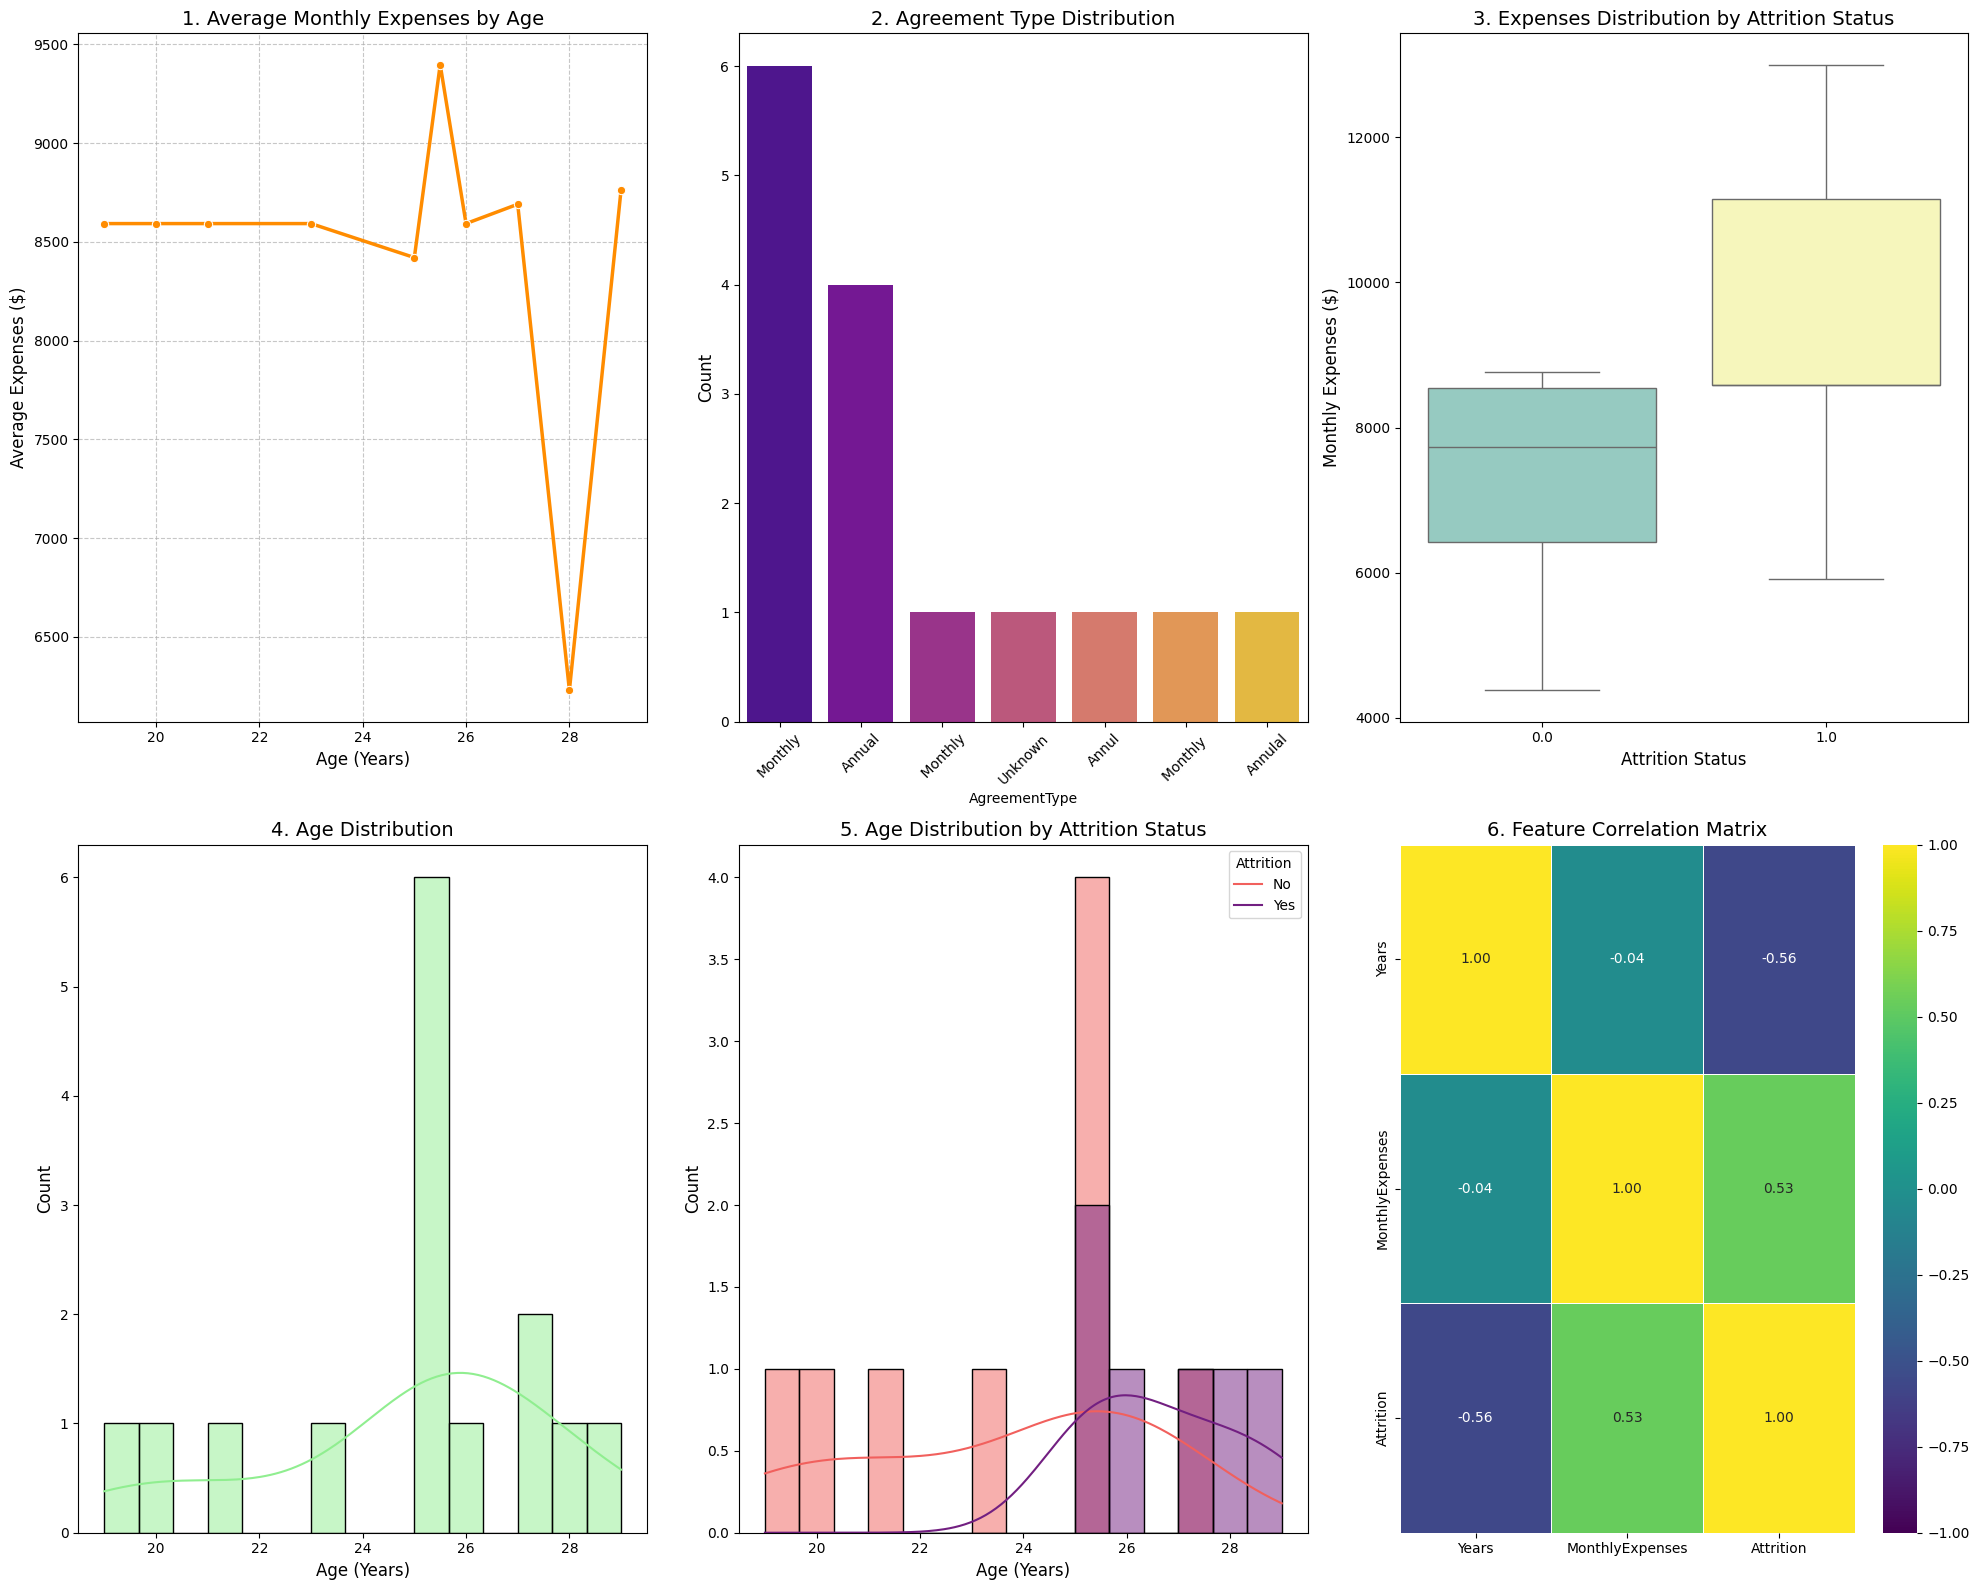


Classification Model Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         2
         1.0       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4


Classification Feature Importance:
               Feature  Coefficient
                 Years    -0.849444
       MonthlyExpenses     0.046324
  AgreementType_Annual     0.007619
 AgreementType_Monthly    -0.007487
AgreementType_ Monthly     0.000251
 AgreementType_Unknown     0.000052
 AgreementType_Annulal    -0.000026
   AgreementType_Annul     0.000000
AgreementType_Monthly      0.000000


=== LINEAR REGRESSION RESULTS ===
R-squared Score: -1.60
Mean Squared Error: 6413540.72

Regression Feature Importance:
               Feature   Coefficient
             Attrition  3.342182e+03
 AgreementType_Unkno

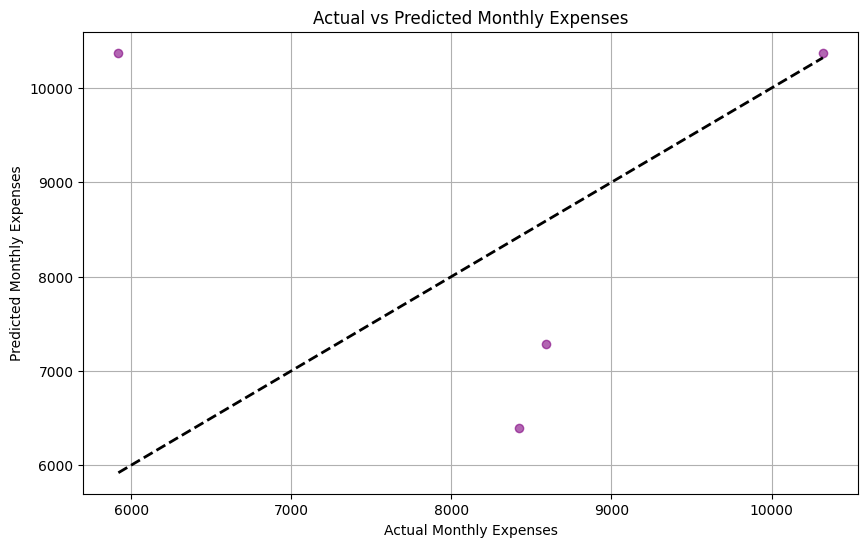

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
from io import StringIO

# ======================================
# 1. LOAD AND DISPLAY MESSY DATASET
# ======================================
raw_dataset = """ClientID,Years,MonthlyExpenses,AgreementType,Attrition
Cli101,25,8421, Monthly,0
Cli102,thirty,12567,Annual,1
Cli103,,7032,Monthly,0
Cli104,19,NaN,Annual,1
Cli105,24,9821,Monthly,maybe
Cli106,27,4382,,0
Cli107,21,NaN,Monthly,1
Cli108,28,6230,Annul,0
Cli109,23,eleven thousand,Monthly,1
Cli110,20,-9345,Annual,1
Cli111,26,4890,Monthly,none
Cli112,,10321,Monthly,1
Cli113,29,8765,Monthly ,0
Cli114,twenty-four,5920,Monthly,1
Cli115,23,11890,Annual,
,22,4530,Monthly,1
Cli117,27,13000,Annulal,1
Cli118,26,,Monthly,0
Cli119,25,2940,Monthly,yes
Cli120,NaN,11150,Annual,1"""

df_original = pd.read_csv(StringIO(raw_dataset))
print("=== INITIAL UNCLEANED DATASET ===")
print(df_original.to_string(index=False))
print("\n" + "="*50 + "\n")

# ======================================
# 2. CLEAN THE DATA
# ======================================
df_clean = df_original.copy()

df_clean['Years'] = pd.to_numeric(df_clean['Years'], errors='coerce')

df_clean['MonthlyExpenses'] = pd.to_numeric(df_clean['MonthlyExpenses'], errors='coerce')
df_clean.loc[df_clean['MonthlyExpenses'] < 0, 'MonthlyExpenses'] = np.nan

df_clean['AgreementType'] = df_clean['AgreementType'].replace({
    '1': 'Monthly',
    'Annual': 'Annual',
    'Monthly': 'Monthly'
}).replace({np.nan: 'Unknown'})

df_clean['Attrition'] = pd.to_numeric(df_clean['Attrition'], errors='coerce')
df_clean = df_clean[df_clean['Attrition'].isin([0, 1])]

df_clean = df_clean.dropna(subset=['ClientID'])
df_clean['Years'] = df_clean['Years'].fillna(df_clean['Years'].median())
df_clean['MonthlyExpenses'] = df_clean['MonthlyExpenses'].fillna(df_clean['MonthlyExpenses'].median())
df_clean = df_clean[(df_clean['MonthlyExpenses'] >= 0) & (df_clean['MonthlyExpenses'] <= 20000)]

print("=== PROCESSED CLEAN DATASET ===")
print(df_clean.to_string(index=False))
print("\n" + "="*50 + "\n")

# ======================================
# 3. ENHANCED VISUALIZATION (6 GRAPHS)
# ======================================
plt.figure(figsize=(20, 16))

plt.subplot(2, 3, 1)
df_grouped = df_clean.groupby('Years')['MonthlyExpenses'].mean().reset_index()
sns.lineplot(data=df_grouped, x='Years', y='MonthlyExpenses',
             marker='o', color='darkorange', linewidth=2.5)
plt.title('1. Average Monthly Expenses by Age', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Average Expenses ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(2, 3, 2)
agreement_counts = df_clean['AgreementType'].value_counts()
sns.barplot(x=agreement_counts.index, y=agreement_counts.values,
            hue=agreement_counts.index, palette='plasma', legend=False)
plt.title('2. Agreement Type Distribution', fontsize=14)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(x='Attrition', y='MonthlyExpenses', data=df_clean,
            hue='Attrition', palette='Set3', legend=False)
plt.title('3. Expenses Distribution by Attrition Status', fontsize=14)
plt.xlabel('Attrition Status', fontsize=12)
plt.ylabel('Monthly Expenses ($)', fontsize=12)

plt.subplot(2, 3, 4)
sns.histplot(df_clean['Years'], bins=15, kde=True,
             color='lightgreen', edgecolor='black')
plt.title('4. Age Distribution', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot(2, 3, 5)
sns.histplot(data=df_clean, x='Years', hue='Attrition',
             bins=15, kde=True, palette='magma')
plt.title('5. Age Distribution by Attrition Status', fontsize=14)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Attrition', labels=['No', 'Yes'])

plt.subplot(2, 3, 6)
correlation_matrix = df_clean[['Years', 'MonthlyExpenses', 'Attrition']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis',
            fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('6. Feature Correlation Matrix', fontsize=14)

plt.tight_layout()
plt.show()

# ======================================
# 4. PREDICTIVE MODELING - CLASSIFICATION
# ======================================
df_model = pd.get_dummies(df_clean, columns=['AgreementType'])

X = df_model.drop(['ClientID', 'Attrition'], axis=1)
y = df_model['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

y_pred_class = logit_model.predict(X_test)
print(f"\nClassification Model Accuracy: {accuracy_score(y_test, y_pred_class):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class, zero_division=1))

logit_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logit_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nClassification Feature Importance:")
print(logit_importance.to_string(index=False))

# ======================================
# 5. PREDICTIVE MODELING - LINEAR REGRESSION
# ======================================
X_reg = df_model.drop(['ClientID', 'MonthlyExpenses'], axis=1)
y_reg = df_model['MonthlyExpenses']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.25, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

y_pred_reg = linear_model.predict(X_test_reg)
print("\n\n=== LINEAR REGRESSION RESULTS ===")
print(f"R-squared Score: {r2_score(y_test_reg, y_pred_reg):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.2f}")

reg_importance = pd.DataFrame({
    'Feature': X_reg.columns,
    'Coefficient': linear_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nRegression Feature Importance:")
print(reg_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='purple')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.xlabel('Actual Monthly Expenses')
plt.ylabel('Predicted Monthly Expenses')
plt.title('Actual vs Predicted Monthly Expenses')
plt.grid(True)
plt.show()